# Importing the Libraries

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Getting and loading the Training, Testing and Validation set

In [2]:
train_path = r"C:\AI-DocHelper_Models_Code\Colon_Cancer_Detection\dataset\train"
test_path = r"C:\AI-DocHelper_Models_Code\Colon_Cancer_Detection\dataset\test"
validation_path = r"C:\AI-DocHelper_Models_Code\Colon_Cancer_Detection\dataset\val"

In [3]:
batch_size = 16
img_size = (100, 100)

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40.,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = img_size,
                                                   batch_size = batch_size,
                                                   class_mode = "categorical")

validation_generator = validation_datagen.flow_from_directory(validation_path,
                                                             target_size = img_size,
                                                             batch_size = batch_size,
                                                             class_mode = "categorical")

Found 3000 images belonging to 8 classes.
Found 1000 images belonging to 8 classes.


# Getting the class names

In [6]:
temp_classes = dict(train_generator.class_indices)

classes = dict()
for (k, v) in temp_classes.items() :
    classes[v] = k
print(classes)

{0: 'dyed-lifted-polyps', 1: 'dyed-resection-margins', 2: 'esophagitis', 3: 'normal-cecum', 4: 'normal-pylorus', 5: 'normal-z-line', 6: 'polyps', 7: 'ulcerative-colitis'}


# Building the CNN

## Initalising the CNN

In [7]:
model = Sequential()

## Adding VGG16 model as Convolutional Base

In [8]:
conv_base = VGG16(weights = "imagenet",
                 include_top = False,
                 input_shape = (img_size[0], img_size[1], 3))

In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [10]:
model.add(conv_base)

# Flattening all the layers

In [11]:
model.add(Flatten())

## Adding the First Fully Connected Layer

In [12]:
model.add(Dense(units = 128, activation = "relu"))

## Adding the Second Fully Connected Layer

In [13]:
model.add(Dense(units = 64, activation = "relu"))

## Adding the Final Fully Connected Layer

In [14]:
model.add(Dense(units = 8, activation = "sigmoid"))

## Displaying the model summary

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
Total params: 15,313,416
Trainable params: 15,313,416
Non-trainable params: 0
_________________________________________________________________


## Compiling the CNN model

In [16]:
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy", 
             metrics = ["accuracy"])

# Training the CNN

## Saving the Best model only

In [17]:
checkpoint = ModelCheckpoint(filepath = "colon_cancer.h5",
                            save_best_only = True)

## Stopping the Training, if there is no improvement

In [18]:
earlyStopping = EarlyStopping(monitor="val_loss", 
                              patience = 12,
                             restore_best_weights = True,
                             verbose = 1)

## Calculating the steps_per_epoch and validation_steps

In [19]:
import math

batch_size = batch_size
training_size = 3000
validation_size = 1000

compute_steps_per_epoch = lambda x : int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
validation_steps = compute_steps_per_epoch(validation_size)

print(steps_per_epoch)
print(validation_steps)

188
63


In [20]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = steps_per_epoch,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = validation_steps,
                             callbacks = [checkpoint, earlyStopping])

C:\Users\RAJ SHAH\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
188/188 [==============================] - 429s 2s/step - loss: 1.9049 - accuracy: 0.2337 - val_loss: 1.2109 - val_accuracy: 0.4860
Epoch 2/30
188/188 [==============================] - 400s 2s/step - loss: 1.1697 - accuracy: 0.4456 - val_loss: 0.9657 - val_accuracy: 0.5320
Epoch 3/30
188/188 [==============================] - 402s 2s/step - loss: 1.0018 - accuracy: 0.5099 - val_loss: 0.9723 - val_accuracy: 0.5610
Epoch 4/30
188/188 [==============================] - 400s 2s/step - loss: 1.0257 - accuracy: 0.5050 - val_loss: 0.8591 - val_accuracy: 0.5660
Epoch 5/30
188/188 [==============================] - 401s 2s/step - loss: 1.0144 - accuracy: 0.5149 - val_loss: 0.8971 - val_accuracy: 0.5500
Epoch 6/30
188/188 [==============================] - 395s 2s/step - loss: 0.9305 - accuracy: 0.5456 - val_loss: 0.8079 - val_accuracy: 0.5960
Epoch 7/30
188/188 [==============================] - 410s 2s/step - loss: 0.8751 - accuracy: 0.5695 - val_loss: 1.0423 - val_accuracy: 0.4950

# Saving the model

In [21]:
model_json = model.to_json()

with open("colon_cancer.json", "w") as json_file :
    json_file.write(model_json)

# Visualizing the Training Performance

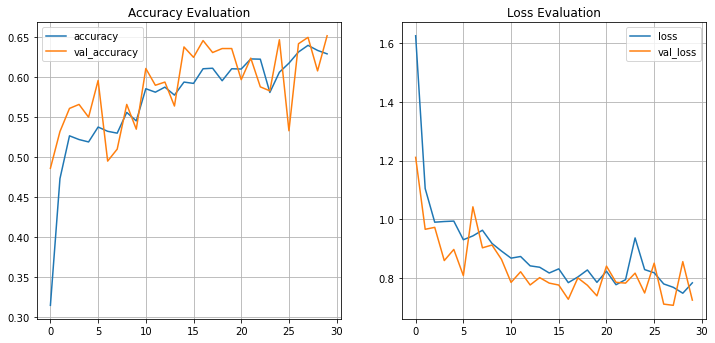

In [22]:
plt.figure(figsize = (12, 12))

plt.subplot(2, 2, 1)
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.grid()
plt.title("Accuracy Evaluation")

plt.subplot(2, 2, 2)
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.grid()
plt.legend()
plt.title("Loss Evaluation")

plt.savefig("colon_cancer_model_history.jpg")

# Getting the accuracy for test set

In [23]:
test_accuracy = model.evaluate(validation_generator)
print(test_accuracy)

63/63 [==============================] - 40s 637ms/step - loss: 0.7243 - accuracy: 0.6520
[0.7243490219116211, 0.6520000100135803]


In [24]:
preds = model.predict(validation_generator, verbose=1)
preds

63/63 [==============================] - 39s 618ms/step


array([[1.33031011e-02, 4.06861305e-04, 7.39134014e-01, ...,
        9.15927887e-01, 8.03909838e-01, 1.14518374e-01],
       [1.62908137e-02, 2.98100710e-03, 9.84789371e-01, ...,
        9.93886471e-01, 1.00606501e-01, 4.88397479e-03],
       [1.95067972e-01, 1.57870650e-02, 3.49760056e-03, ...,
        2.17214227e-03, 9.73992467e-01, 9.43435073e-01],
       ...,
       [9.96775985e-01, 9.99611974e-01, 1.69253326e-05, ...,
        9.83569066e-07, 8.36245817e-06, 2.51147449e-02],
       [9.98579741e-01, 9.99858439e-01, 1.05108420e-05, ...,
        4.59144587e-07, 3.29492241e-06, 2.01451182e-02],
       [8.24585557e-03, 7.10278749e-04, 1.70001388e-03, ...,
        4.06756997e-03, 9.60582376e-01, 9.91272211e-01]], dtype=float32)

In [25]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(predictions)

[[0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]]
